## distance correlation 与相关距离(correlation  distance)


### 什么是相关距离
解释相关系首先要解释相关距离，相关系数是衡量随机变量X与Y相关程度的一种方法，相关系数的取值范围是[-1,1]。

相关系数的绝对值越大，则表明X与Y相关度越高。

当X与Y线性相关时，相关系数取值为1（正线性相关）或-1（负线性相关）。

相关系数定义如下：

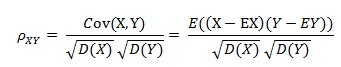

而相关距离= 1-相关系数

下面是scipy中的相关距离公式，我们过一会将会利用scipy中的该函数计算相关系数

$$1 - \frac{(u - \bar{u}) \cdot (v - \bar{v})} {{||(u - \bar{u})||}_2 {||(v - \bar{v})||}_2}$$

### 什么是相关系数

distance correlation，也是就是dcor，也是一种也是衡量随机变量X与Y相关程度的一种方法。其在[wika中有详细的解释](https://en.wikipedia.org/wiki/Distance_correlation)，以下内容摘自维基百科。

在统计学和概率论中，距离相关或距离协方差是两个任意（不一定相等）维度的成对随机向量之间的依赖性的度量。当且仅当随机向量是独立的时，总体距离相关系数为零。因此，距离相关性测量两个随机变量或随机向量之间的线性和非线性关联。这与Pearson的相关性形成对比，Pearson的相关性只能检测两个随机变量之间的线性关联。

依赖的经典措施，Pearson相关系数，是主要对两个变量之间的线性关系。距离相关性是由GáborJ.Székely于2005年在几个讲座中引入的，以解决Pearson 相关性的这一缺陷，即它对于因变量很容易为零。相关= 0（不相关）并不意味着独立，而距离相关= 0确实意味着独立。距离相关的第一个结果发表于2007年和2009年。后来又证明了距离协方差与布朗协方差相同。

数年前原作者又新发表了《Partial Distance Correlation with Methods for Dissimilarities》，此处超出本处范围，所以不再做过多解释。


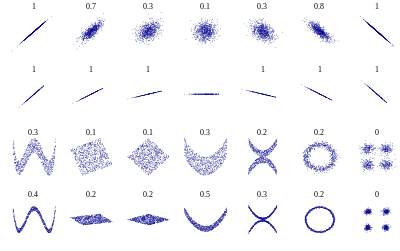
<center>Several sets of (x, y) points, with the distance correlation coefficient of x and y for each set. Compare to the graph on correlation</center>

In [1]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import copy


def distcorr(Xval, Yval, pval=True, nruns=500):
    """ Compute the distance correlation function, returning the p-value.
    Based on Satra/distcorr.py (gist aa3d19a12b74e9ab7941)
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    (0.76267624241686671, 0.404)
    """
    X = np.atleast_1d(Xval)
    Y = np.atleast_1d(Yval)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()

    dcov2_xy = (A * B).sum() / float(n * n)
    dcov2_xx = (A * A).sum() / float(n * n)
    dcov2_yy = (B * B).sum() / float(n * n)
    dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))

    if pval:
        greater = 0
        for i in range(nruns):
            Y_r = copy.copy(Yval)
            np.random.shuffle(Y_r)
            if distcorr(Xval, Y_r, pval=False) >= dcor:
                greater += 1
        return (dcor, greater / float(nruns))
    else:
        return dcor

**Note:** "correlation distance" is different from "distance correlation"

**Note:** 计算P数值需要较长的时间，以下计算就花费了53.3s，因此非必要情况，建议关闭P值计算

In [2]:
from scipy.spatial.distance import correlation

x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x

print("Without noise:")
print("scipy.spatial.distance.correlation", 1-correlation(x, y))
print("distcorr and p-value", distcorr(x, y))

np.random.seed(0)
y += np.random.uniform(-1, 1, x.shape[0])  # add some noise

print("With noise:")
print("scipy.spatial.distance.correlation", 1-correlation(x, y))
print("distcorr and p-value", distcorr(x, y))

Without noise:
scipy.spatial.distance.correlation 0.24826953127345375
distcorr and p-value (0.277642550526117, 0.0)
With noise:
scipy.spatial.distance.correlation 0.19518835158998882
distcorr and p-value (0.21003798109420846, 0.0)


## 参考文章
- [相关系数( Correlation Coefficient )与相关距离(Correlation Distance)](http://blog.sina.com.cn/s/blog_407e5c1c0102vxyz.html)
 - [Github上的python dcor实现方案](https://gist.github.com/wladston/c931b1495184fbb99bec)
 - [wiki : Distancecorrelation](https://en.wikipedia.org/wiki/Distance_correlation)
 - [Partial Distance Correlation with Methods for Dissimilarities](https://www.researchgate.net/publication/257592630_Partial_Distance_Correlation_with_Methods_for_Dissimilarities)